# Building A Web Based Data Visualization wit Dash - Plotly

## Using the Ontario School and Under 20 Ont COVID-19 Data sets

#### By: Peter Stangolis

## Import required libraries

In [266]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

In [267]:
df = pd.read_csv("ont_school_covid19_101.csv")
df.head()

,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
0,2020-09-11,13,0,4828,0,0,0,NaN,NaN,13,4,9,NaN
1,2020-09-14,15,0,4828,2,1,1,NaN,NaN,15,5,10,NaN
2,2020-09-15,27,0,4828,14,4,4,6.0,NaN,29,9,14,6.0
3,2020-09-16,35,0,4828,12,6,4,2.0,NaN,41,15,18,8.0
4,2020-09-17,51,1,4828,21,5,4,12.0,NaN,62,20,22,20.0


In [294]:
df.reported_date = pd.to_datetime(df.reported_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   reported_date                                56 non-null     datetime64[ns]
 1   current_schools_w_cases                      56 non-null     int64         
 2   current_schools_closed                       56 non-null     int64         
 3   current_total_number_schools                 56 non-null     int64         
 4   new_total_school_related_cases               56 non-null     int64         
 5   new_school_related_student_cases             56 non-null     int64         
 6   new_school_related_staff_cases               56 non-null     int64         
 7   new_school_related_unspecified_cases         54 non-null     float64       
 8   recent_total_school_related_cases            42 non-null     float64       
 9   c

In [268]:
cols = [x for x in df.columns]

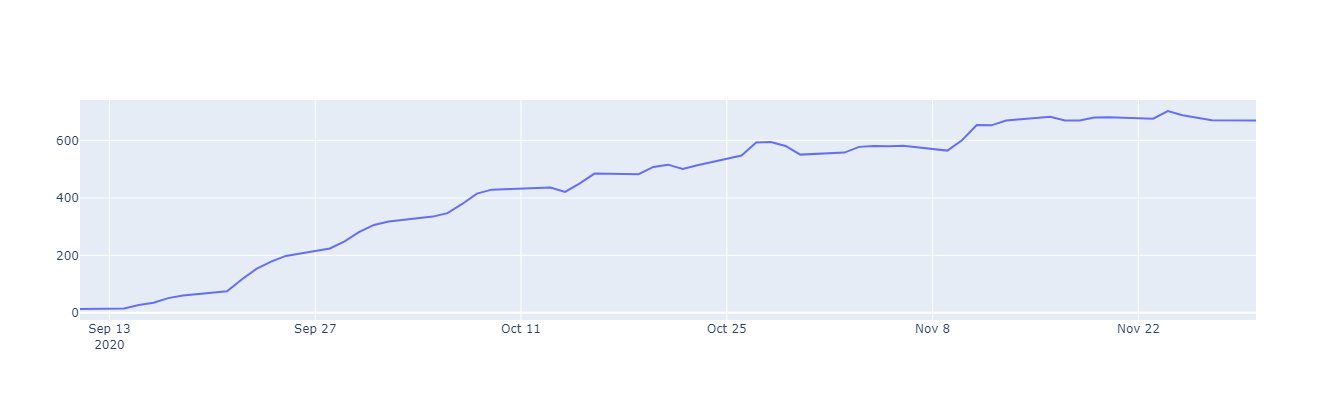

In [269]:
selection = ['current_schools_w_cases', 'cumulative_school_related_cases', 'cumulative_school_related_student_cases', 'cumulative_school_related_staff_cases']

fig = go.Figure([go.Scatter(x=df['reported_date'], y=df['current_schools_w_cases'])])
fig.update_layout(width = 600, height = 400)
fig.show()

In [270]:
last_reported_date = max(df.reported_date)
print("Dashboard up to date as of:",last_reported_date)

Dashboard up to date as of: 2020-11-30


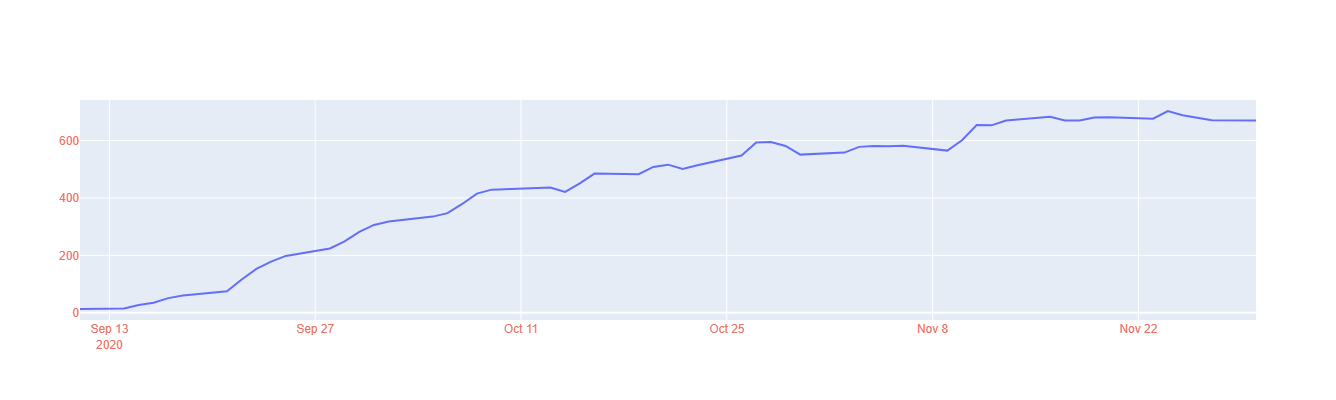

In [271]:
   fig.update_layout(
            font_family = "Arial",
            title_font_family = "Arial",
            title_font_color= "#2E86C1",
            font_color = "#EC7063"
    )

In [272]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

df = pd.read_csv("ont_school_covid19_101.csv")

selection = ['current_schools_w_cases', 'cumulative_school_related_cases', 'cumulative_school_related_student_cases', 'cumulative_school_related_staff_cases']


app = dash.Dash(__name__)

app.layout = html.Div([
    
    html.H1(children="Cumulative COVID-19 Cases in Ont. Schools", 
            style={'text-align':'center'}),
    
    #html.Div(children="Dashboard up to date as of:"),
    
    
    dcc.Dropdown(id="ticker",
                options=[{"label": x, "value": x} 
                 for x in selection],
                value=df.columns[1],
                clearable=False,
                style = {'width': '40%'}
                ),
    
    html.Div(id='output_container', children=[]),
    html.Br(),
    
    dcc.Graph(id="time-series-chart", figure={},
             style = {'width': '50%'})
])


@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id = "time-series-chart", component_property =  'figure')], 
    [Input(component_id = "ticker", component_property = "value")])



def display_time_series(ticker):
    
    container = "Select Graph to Display from Dropdown Menu"
    
    fig = px.line(
        data_frame = df,
        x = 'reported_date', 
        y = ticker,
        title = f"Cumulative COVID-19 Cases in Students, Staff & Total <br> Report Updated: {last_reported_date}",
    )
    
    fig.update_layout(
        title={
            'y' : 0.9,
            'x' : 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        })

    return container, fig




if __name__ == '__main__':
    app.run_server(debug=False, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Nov/2020 14:59:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 14:59:43] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 14:59:43] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 14:59:43] "GET /_favicon.ico?v=1.17.0 HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 14:59:43] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 14:59:53] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2020 15:00:00] "POST /_dash-update-component HTTP/1.1" 200 -


## Summary of COVID-19 Cases in ONT Schools Data set

In [273]:
url = "https://data.ontario.ca/dataset/b1fef838-8784-4338-8ef9-ae7cfd405b41/resource/7fbdbb48-d074-45d9-93cb-f7de58950418/download/schoolcovidsummary.csv"
df_sum = pd.read_csv(url)
df_sum.head()

,collected_date,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,...,recent_school_related_unspecified_cases,past_total_school_related_cases,past_school_related_student_cases,past_school_related_staff_cases,past_school_related_unspecified_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases,Unnamed: 21
0,2020-09-10,2020-09-11,13,0,4828,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13,4,9,NaN,NaN
1,2020-09-11,2020-09-14,15,0,4828,2,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,15,5,10,NaN,NaN
2,2020-09-14,2020-09-15,27,0,4828,14,4,4,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29,9,14,6.0,NaN
3,2020-09-15,2020-09-16,35,0,4828,12,6,4,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,41,15,18,8.0,NaN
4,2020-09-16,2020-09-17,51,1,4828,21,5,4,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,62,20,22,20.0,NaN


In [274]:
#df_sum["reported_date"] = pd.to_datetime(df_sum["reported_date"])
#df_sum.info()

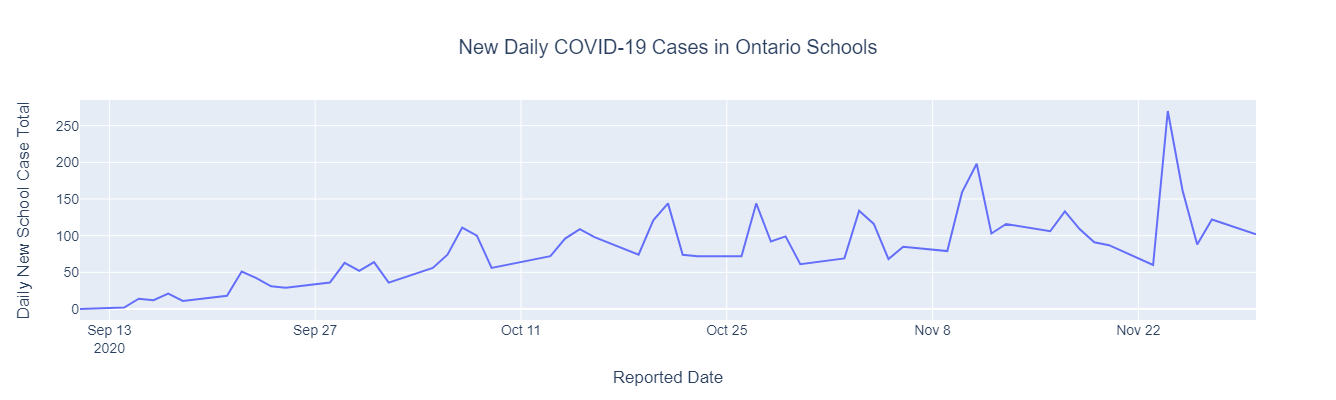

In [275]:
fig = go.Figure([go.Scatter(x=df_sum.reported_date, y=df_sum.new_total_school_related_cases)])
fig.update_layout(
    width = 600, height = 400,
    xaxis_title = "Reported Date",
    yaxis_title = "Daily New School Case Total",
    title={
        'text' : "New Daily COVID-19 Cases in Ontario Schools",
        'y' : 0.9,
        'x' : 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
    font=dict(
        family = 'Arial',
        size = 14
        ))
fig.show()

## Ontario Schools with Active Cases Data set

In [276]:
url = "https://data.ontario.ca/dataset/b1fef838-8784-4338-8ef9-ae7cfd405b41/resource/8b6d22e2-7065-4b0f-966f-02640be366f2/download/schoolsactivecovid.csv"
df_active = pd.read_csv(url)
df_active["reported_date"] = pd.to_datetime(df_active["reported_date"])

In [277]:
df_active.head()

,collected_date,reported_date,school_board,school,municipality,confirmed_student_cases,confirmed_staff_cases,confirmed_unspecified_cases,total_confirmed_cases
0,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,École élémentaire catholique Roger-Saint-Denis,Ottawa,0,1,NaN,1
1,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,École élémentaire catholique Saint-François-d’...,Ottawa,1,0,NaN,1
2,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,École élémentaire catholique Sainte-Anne,Ottawa,1,0,NaN,1
3,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,École élémentaire catholique Laurier-Carrière,Ottawa,1,0,NaN,1
4,2020-09-10,2020-09-11,Conseil des écoles catholiques du Centre-Est (...,École intermédiaire catholique Franco-Ouest,Ottawa,1,0,NaN,1


### Filter the Active Case Data set for the last reported date:

In [278]:
df_active_now = df_active[df_active.reported_date == max(df_active.reported_date)]
df_active_now.tail()

,collected_date,reported_date,school_board,school,municipality,confirmed_student_cases,confirmed_staff_cases,confirmed_unspecified_cases,total_confirmed_cases
24876,2020-11-27,2020-11-30,York Region District School Board,Viola Desmond Public School,Vaughan,1,0,0.0,1
24877,2020-11-27,2020-11-30,York Region District School Board,William Armstrong Public School,Markham,1,0,0.0,1
24878,2020-11-27,2020-11-30,York Region District School Board,William Berczy Public School,Markham,0,1,0.0,1
24879,2020-11-27,2020-11-30,York Region District School Board,Wilshire Elementary School,Vaughan,1,0,0.0,1
24880,2020-11-27,2020-11-30,York Region District School Board,Woodbridge College,Vaughan,1,0,0.0,1


In [279]:
df_municiaplity_now = df_active_now.groupby("municipality")['total_confirmed_cases'].sum().reset_index().sort_values(by=["total_confirmed_cases"], ascending=False).head(30)
df_municiaplity_now.head(3)

,municipality,total_confirmed_cases
71,Toronto,374
7,Brampton,128
42,Mississauga,79


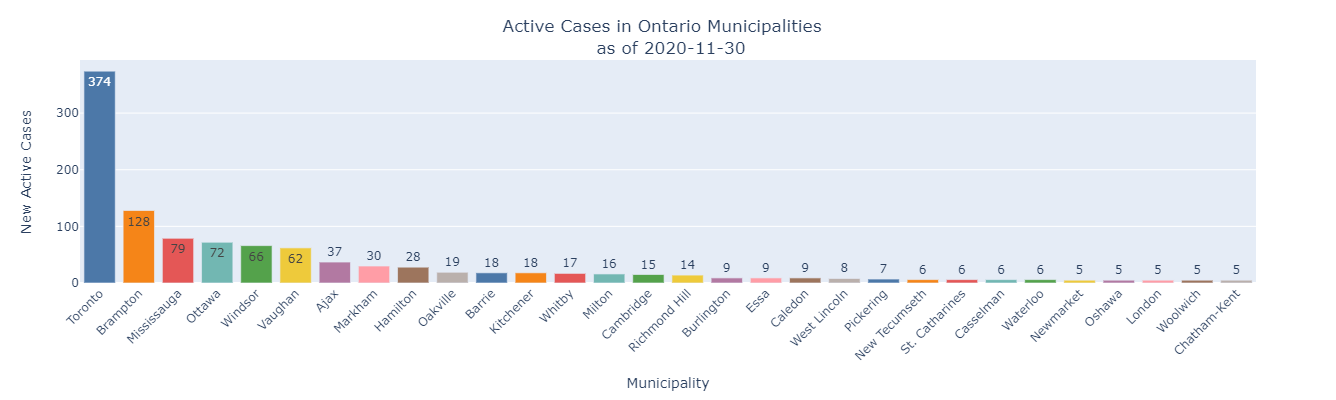

In [282]:
fig = px.bar(df_municiaplity_now, y = 'total_confirmed_cases', x = 'municipality',
            text = 'total_confirmed_cases', color = 'municipality',
            color_discrete_sequence = px.colors.qualitative.T10)
fig.update_layout(
    showlegend=False,
    xaxis_title = "Municipality",
    yaxis_title = "New Active Cases",
    title={
        'text' : f" Active Cases in Ontario Municipalities  <br> as of {max(df_active.reported_date).date()}",
        'y' : 0.92,
        'x' : 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
    xaxis_tickangle = -45,
    uniformtext_minsize = 10)
fig.update_layout(
    width = 1000, height = 400)
fig

In [283]:
df.tail()

,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
51,2020-11-24,703,4,4828,270,223,47,0.0,1281.0,4170,2516,568,1086.0
52,2020-11-25,688,4,4828,162,138,24,0.0,1193.0,4269,2609,573,1087.0
53,2020-11-26,679,4,4828,88,70,18,0.0,1176.0,4349,2673,589,1087.0
54,2020-11-27,671,6,4828,122,99,23,0.0,1180.0,4470,2769,614,1087.0
55,2020-11-30,670,4,4828,102,86,15,1.0,1185.0,4573,2855,630,1088.0


In [296]:
datetime_index = pd.DatetimeIndex(df.reported_date.values)
df_weekly = df.set_index(datetime_index)
df_weekly.drop('reported_date', axis=1, inplace = True)
df_weekly.head()

,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
2020-09-11,13,0,4828,0,0,0,NaN,NaN,13,4,9,NaN
2020-09-14,15,0,4828,2,1,1,NaN,NaN,15,5,10,NaN
2020-09-15,27,0,4828,14,4,4,6.0,NaN,29,9,14,6.0
2020-09-16,35,0,4828,12,6,4,2.0,NaN,41,15,18,8.0
2020-09-17,51,1,4828,21,5,4,12.0,NaN,62,20,22,20.0


In [297]:
df_weekly["week_number"] = df_weekly.index.weekofyear

C:\Users\P\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



### Ontario Schools COVID-19 Cases - Weekly Mean

In [298]:
df_weekly = df_weekly.new_total_school_related_cases.resample("W").mean().round()
df_weekly = df_weekly.reset_index()
df_weekly.head()

,index,new_total_school_related_cases
0,2020-09-13,0.0
1,2020-09-20,12.0
2,2020-09-27,34.0
3,2020-10-04,50.0
4,2020-10-11,79.0


In [299]:
print(colors)
print(len(df_weekly))

['lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'lightslategrey', 'crimson']
13


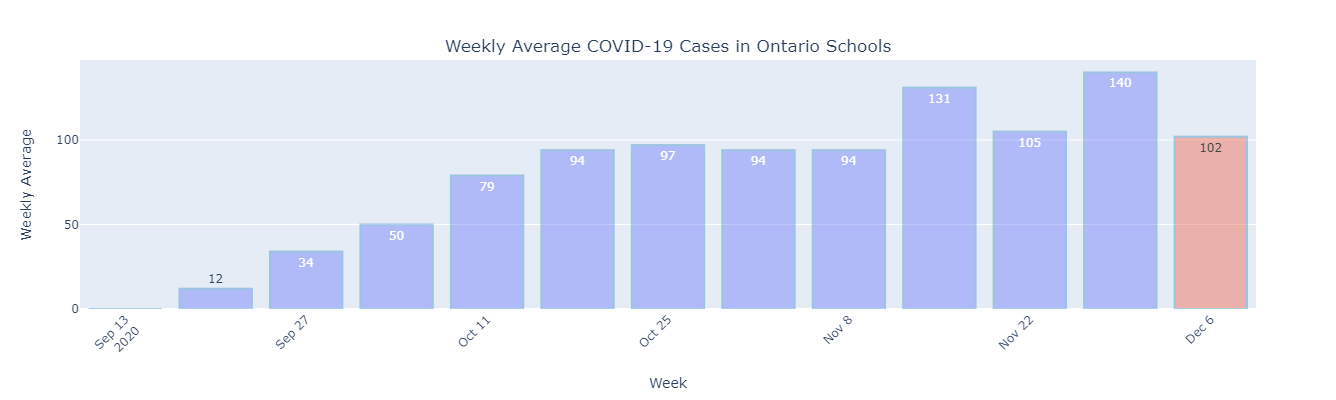

In [300]:
colors = ['lightslategrey',] * len(df_weekly)
colors[-1] = 'crimson'

fig = px.bar(df_weekly, y = 'new_total_school_related_cases', x = 'index', opacity=0.4,
             text = 'new_total_school_related_cases',
             color = colors
            )
fig.update_layout(
    showlegend=False,
    xaxis_title = "Week",
    yaxis_title = "Weekly Average",
    title={
        'text' : f" Weekly Average COVID-19 Cases in Ontario Schools",
        'y' : 0.9,
        'x' : 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
    xaxis_tickangle = -45,
    uniformtext_minsize = 10,
    width = 700, height = 400)
fig.update_traces(
        marker_line_color = "#2E86C1",
        marker_line_width = 2.0)
fig

## Plotly Indicators

In [301]:
df.tail()

,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
51,2020-11-24,703,4,4828,270,223,47,0.0,1281.0,4170,2516,568,1086.0
52,2020-11-25,688,4,4828,162,138,24,0.0,1193.0,4269,2609,573,1087.0
53,2020-11-26,679,4,4828,88,70,18,0.0,1176.0,4349,2673,589,1087.0
54,2020-11-27,671,6,4828,122,99,23,0.0,1180.0,4470,2769,614,1087.0
55,2020-11-30,670,4,4828,102,86,15,1.0,1185.0,4573,2855,630,1088.0


In [302]:
import datetime
#df.reported_date = pd.to_datetime(df.reported_date)
print(max(df.reported_date) - datetime.timedelta(1))

2020-11-29 00:00:00


In [318]:
# Latest Total School Case Number
value_t  = df.loc[df.index[-1], 'new_total_school_related_cases']

# Previous Day School Total
reference_t = df.loc[df.index[-2], 'new_total_school_related_cases']

print(reference_t, value_t)

122 102


In [319]:
#reference_t = df.new_total_school_related_cases[df.reported_date == max(df.reported_date)-datetime.timedelta(1)].values[0]
#value_t = df.new_total_school_related_cases[df.reported_date == max(df.reported_date)].values[0]
#print(reference)
#print(value)

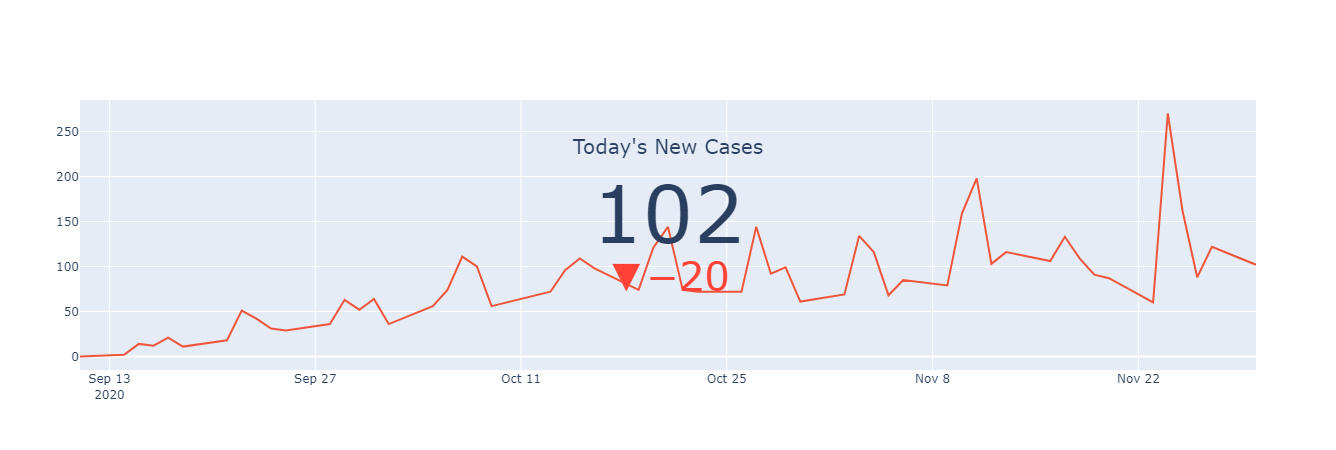

In [320]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "number+delta",
    value = value_t,
    delta = {"reference": reference_t, "valueformat": ".0f"},
    title = {"text": "Today's New Cases"},
    domain = {'y': [0, 1], 'x': [0.25, 0.75]}))

fig.add_trace(go.Scatter(
    y = df.new_total_school_related_cases,
    x = df.reported_date))

#fig.update_layout(xaxis = {'range': [0, 62]})
fig

## Creating a 2 x 2 Metric Figure

In [322]:
# Latest Total School Case Number
value_student  = df.loc[df.index[-1], 'new_school_related_student_cases']

# Previous Day School Total
reference_student = df.loc[df.index[-2], 'new_school_related_student_cases']

print(reference_student, value_student)

99 86


In [324]:
# Latest Total School Case Number
value_staff  = df.loc[df.index[-1], 'new_school_related_staff_cases']

# Previous Day School Total
reference_staff = df.loc[df.index[-2], 'new_school_related_staff_cases']

print(reference_staff, value_staff)


23 15


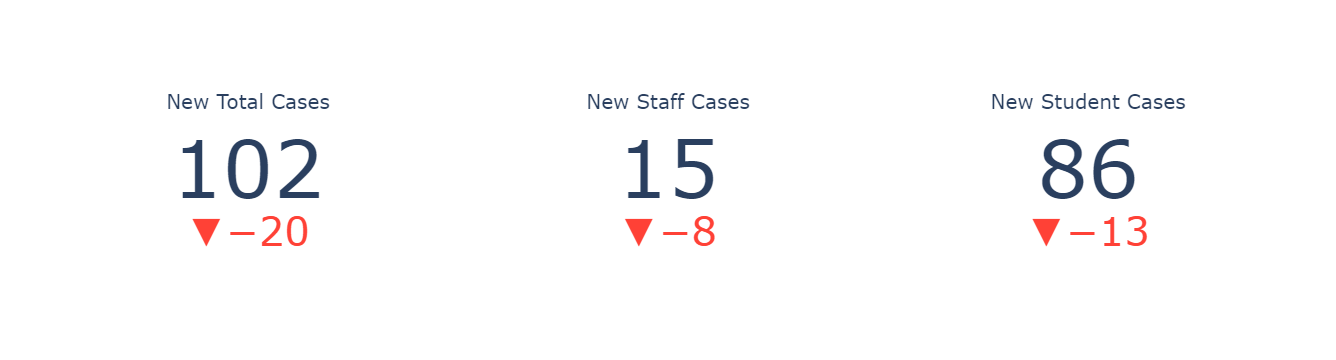

In [325]:

fig = go.Figure()

fig.add_trace(go.Indicator(
    value = value_t,
    delta = {'reference': reference_t},
    mode = "number+delta",
    title = {"text": "New Total Cases"},
    domain = {'row': 0, 'column': 0}))

fig.add_trace(go.Indicator(
    value = value_student,
    delta = {'reference': reference_student, 'relative': False},
    mode = "number+delta",
    title = {"text" :"New Student Cases"},
    domain = {'row': 0, 'column': 2}))

fig.add_trace(go.Indicator(
    mode = "number+delta",
    value = value_staff,
    delta = {"reference": reference_staff},
    title = {"text" :"New Staff Cases"},
    domain = {'row': 0, 'column': 1}))

#fig.add_trace(go.Indicator(
#    mode = "delta",
#    value = 40,
#    domain = {'row': 1, 'column': 1}))

fig.update_layout(
    grid = {'rows': 1, 'columns': 3, 'pattern': "independent"},
    width = 700, height = 350)
   

## School Year - Day Gauge

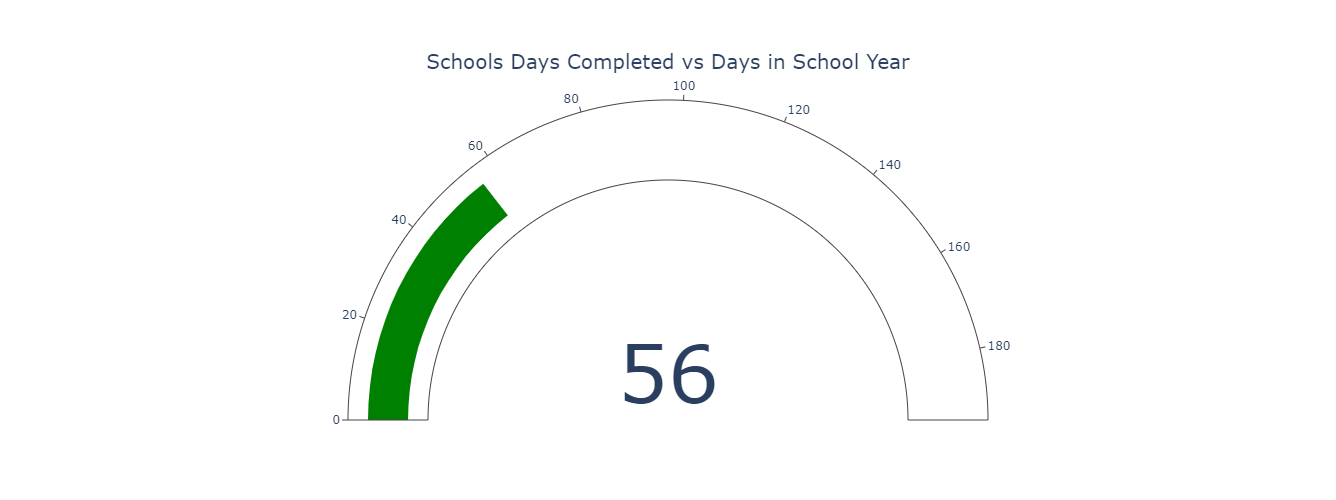

In [326]:
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = df.reported_date.count(),
    title = {'text': "Schools Days Completed vs Days in School Year"},
    domain = {'x': [0, 1], 'y': [0, 1]},
    gauge = {
            'axis': {'visible' : True}
    }
))

fig.update_traces(
    gauge_axis ={
        'range': [0, 194]})

fig.update_layout(
    height = 500, width = 600)

fig.show()